<a href="https://colab.research.google.com/github/janaahmeed/ML-project-/blob/main/ML_project_insurance_saved_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('insurance.csv')

#Exploring the Data

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Exploratory Data Analysis

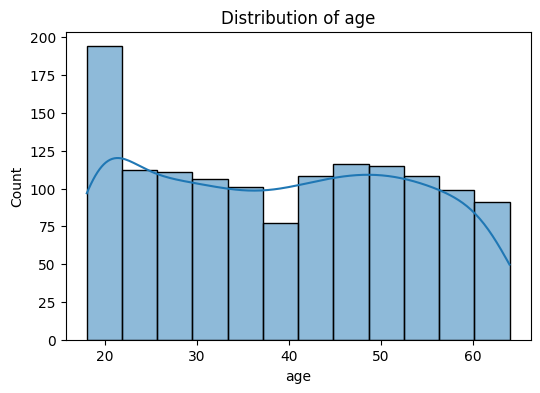

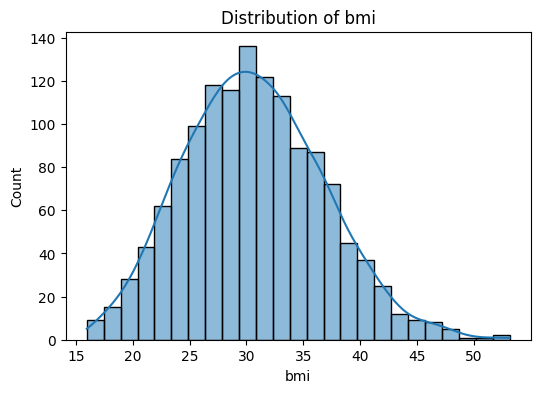

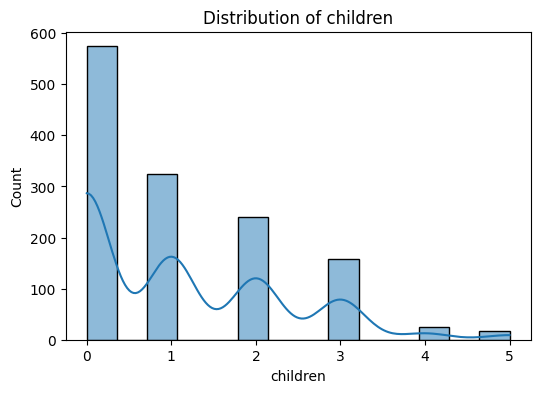

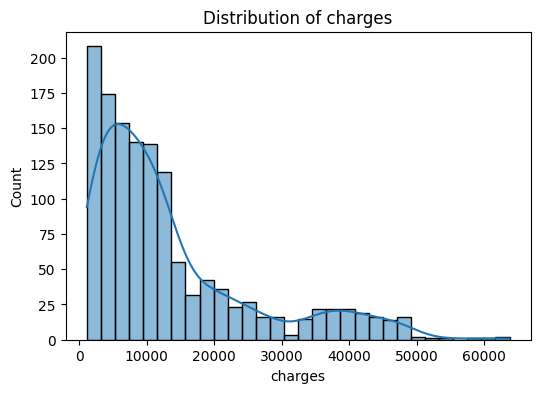

In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

Text(0.5, 1.0, 'Log-Transformed Charges Distribution')

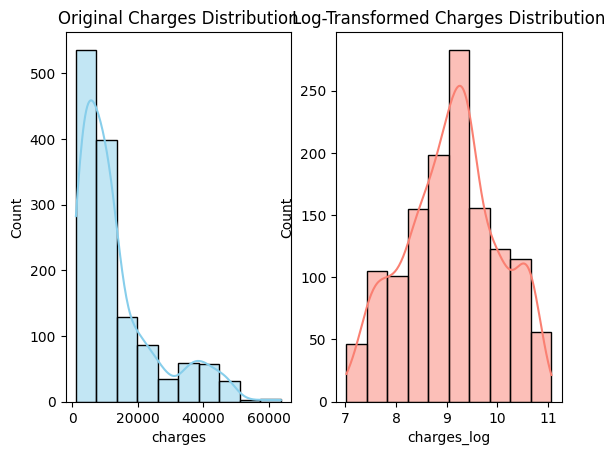

In [ ]:
df["charges_log"] = np.log1p(df["charges"])
plt.subplot(1, 2, 1)
sns.histplot(df["charges"], bins=10, kde=True, color="skyblue")
plt.title("Original Charges Distribution")

# Log-transformed charges distribution
plt.subplot(1, 2, 2)
sns.histplot(df["charges_log"], bins=10, kde=True, color="salmon")
plt.title("Log-Transformed Charges Distribution")

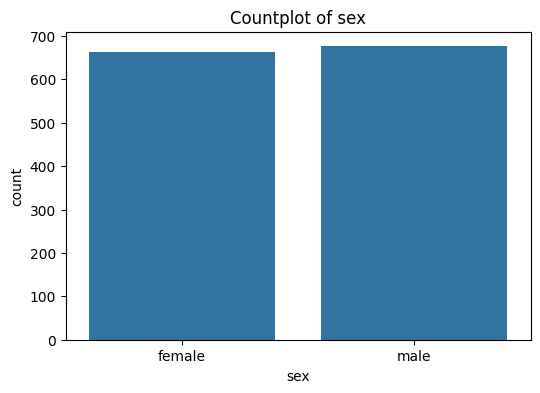

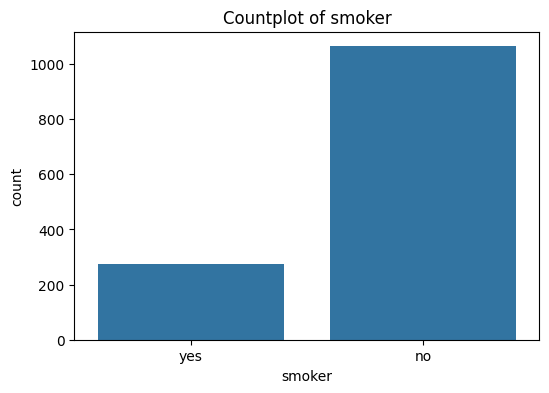

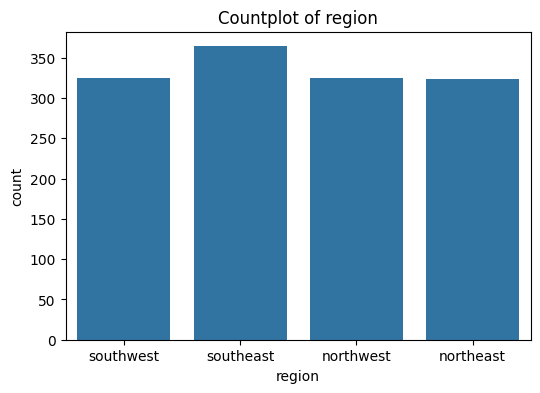

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.show()


## Encoding Categorical Features

In [ ]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})



# One-hot encode region
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Correlation Heatmap

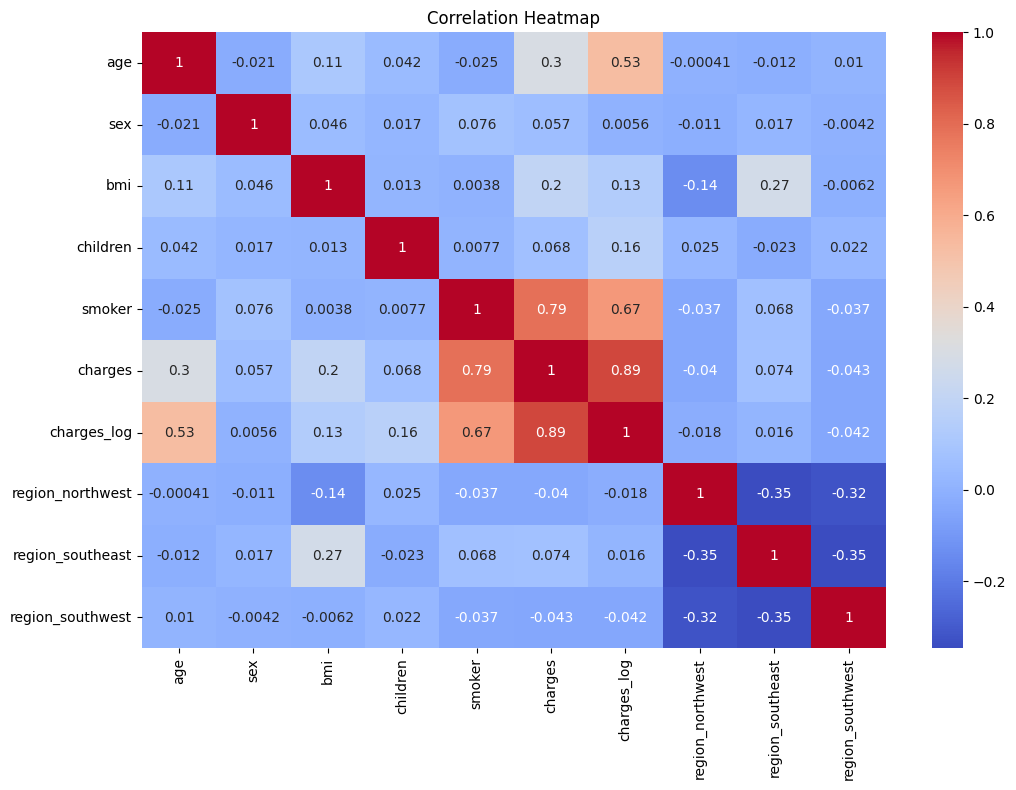

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#Preprocessing & Splitting Dataset

In [ ]:
selected_features = ["age", "bmi", "children", "smoker", "sex", "region_southeast"]

In [ ]:
from sklearn.model_selection import train_test_split

X = df[selected_features]
y = df["charges"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [ ]:
"""from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)"""
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,PolynomialFeatures
scaler = MinMaxScaler()   # better for KNN and there are not outliers
# transform only : The scaler uses the exact same statistics (mean, standard deviation, etc.)
# that it learned in step 1 from the training data to scale the test data (X_test).
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)


print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 33816742.79084328
R² Score: 0.7821770106209518


# Polynomial Linear Regression

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

y_pred_lr = lr.predict(X_test_poly)

print("Polynomial Linear Regression Results")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))
print("--------------------------------")

Polynomial Linear Regression Results
MSE: 20354402.27283434
R² Score: 0.8688916677305483
--------------------------------


#Linear Regression With GridSearchCV

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import  GridSearchCV

# ('fit_intercept') In practice: It allows the line of best fit not to pass through the origin $(0, 0, \dots)$.
#This is usually appropriate for real-world data where the output is rarely zero when inputs are zero.


param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(estimator=LinearRegression(),
                           param_grid=param_grid,
                           cv=5
                          )
grid_search.fit(X_train_scaled, y_train)

# Report best score and parameters

print(f"Best parameters: {grid_search.best_params_}")

# Evaluate on test set
best_model = grid_search.best_estimator_

y_pred= best_model.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------------------")

Best parameters: {'fit_intercept': True, 'positive': True}
MSE: 33981653.95019775
R² Score: 0.7811147722517887
--------------------------------


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = {
 'n_neighbors':[3, 5, 7, 9, 11, 15, 20] ,
 'weights': ['uniform','distance'] ,
 # 1 (Manhattan), 2 (Euclidean)
 'p':[1,2]
}

# Perform grid search
grid_search = GridSearchCV(estimator=KNeighborsRegressor(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2')
grid_search.fit(X_train_scaled, y_train)

#  best score and parameters
print(f"Best score: {grid_search.best_score_:.3f}")
print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

y_pred= best_model.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------------------")

Best score: 0.779
Best parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
MSE: 27165991.949885346
R² Score: 0.8250163354711542
--------------------------------
